array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a9efd1550>,
      dtype=object)

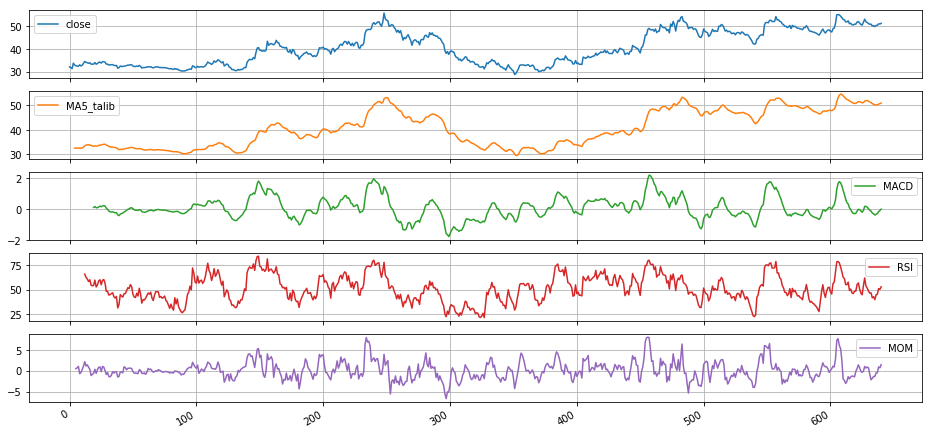

In [3]:
# Reference:
# get MACD and Moving Averages: https://github.com/sammchardy/python-binance/issues/188
# Python获取股票数据和可视化: https://zhuanlan.zhihu.com/p/54299970
# Python实现KDJ的超买和超卖信息提示: https://zhuanlan.zhihu.com/p/40204328
# 使用stockstats计算股票中的16个常用指标方法大全: https://blog.csdn.net/freewebsys/article/details/78578548
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib

%matplotlib inline

df=ts.get_k_data('600600')
# print(df)
close = [float(x) for x in df['close']]

# 移动平均线(MA)计算方法就是求连续若干天的收盘价的算术平均。天数就是MA的参数。
# 在技术分析领域中，移动平均线是必不可少的指标工具。移动平均线利用统计学上的“移动平均”原理，
# 将每天的市场价格进行移动平均计算，求出一个趋势值，用来作为价格走势的研判工具
#
# 计算公式；MA = (C1+C2+C3+C4+C5+....+Cn)/n （C 为收盘价，n 为移动平均周期数）
# Find out a pattern that results to 5% increase within 5 transaction days

# 调用talib计算10日移动平均线的值
df['MA5_talib'] = talib.MA(np.array(close), timeperiod = 5, matype = 2) 
df['MACD'],df['MACDsignal'],df['MACDhist'] = talib.MACD(np.array(close),
                            fastperiod=6, slowperiod=12, signalperiod=9)  
df['RSI']=talib.RSI(np.array(close), timeperiod=12)     #RSI的天数一般是6、12、24
df['MOM']=talib.MOM(np.array(close), timeperiod=5)
# df.tail(12)
df[['close', 'MA5_talib', 'MACD', 'RSI', 'MOM']].plot(subplots=True, grid=True, legend=True ,figsize=(16,8), sharex=True, sharey=False)